In [1]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv ('DataAlumni.csv')
df

,No,Nim,Nama,TTL,Fakultas/Ketrampilan,Alamat,Tahun Masuk,Tahun Lulus,Status Pekerjaan,Lama Masa Tunggu (bulan),Gaji Pertama bekerjaa,Nilai Toefl,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,NaN,2.4,1475635.0,390.0,2.13
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,NaN,NaN,NaN,NaN,NaN
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,2016,Mahasiswa,2.4,1475635.0,NaN,NaN
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,NaN,2.4,1475634.0,413.0,2.75
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,NaN,NaN,NaN,NaN,NaN
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,NaN,2.4,1475635.0,400.0,3.24
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,NaN,2.4,1475635.0,396.0,3.27
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.4,1475635.0,460.0,3.20
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.0,600000.0,403.0,3.24
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,NaN,2.4,1475635.0,450.0,3.06


In [3]:
df.columns =['No', 'NIM', 'Nama', 'TTL', 'FakultasKeterampilan', 'Alamat', 'TahunMasuk', 'TahunLulus', 'StatusKerja', 'LamaMasaTunggu', 'GajiPertama', 'TOEFL', 'IPK']
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,NaN,2.4,1475635.0,390.0,2.13
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,NaN,NaN,NaN,NaN,NaN
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,2016,Mahasiswa,2.4,1475635.0,NaN,NaN
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,NaN,2.4,1475634.0,413.0,2.75
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,NaN,NaN,NaN,NaN,NaN
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,NaN,2.4,1475635.0,400.0,3.24
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,NaN,2.4,1475635.0,396.0,3.27
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.4,1475635.0,460.0,3.20
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.0,600000.0,403.0,3.24
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,NaN,2.4,1475635.0,450.0,3.06


In [5]:
df.isna().sum()

No                       0
NIM                      0
Nama                     0
TTL                      0
FakultasKeterampilan     0
Alamat                   1
TahunMasuk               0
TahunLulus               0
StatusKerja             10
LamaMasaTunggu           2
GajiPertama              2
TOEFL                    3
IPK                      3
dtype: int64

In [7]:
def_alamat = 'Yogyakarta'
df.Alamat.fillna(def_alamat, inplace = True)
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,NaN,2.4,1475635.0,390.0,2.13
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,NaN,NaN,NaN,NaN,NaN
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.4,1475635.0,NaN,NaN
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,NaN,2.4,1475634.0,413.0,2.75
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,NaN,NaN,NaN,NaN,NaN
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,NaN,2.4,1475635.0,400.0,3.24
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,NaN,2.4,1475635.0,396.0,3.27
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.4,1475635.0,460.0,3.20
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.0,600000.0,403.0,3.24
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,NaN,2.4,1475635.0,450.0,3.06


In [8]:
def_statusKerja = 'Mahasiswa'
df.StatusKerja.fillna(def_statusKerja, inplace = True)
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.4,1475635.0,390.0,2.13
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,NaN,NaN,NaN,NaN
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.4,1475635.0,NaN,NaN
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.4,1475634.0,413.0,2.75
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,NaN,NaN,NaN,NaN
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.4,1475635.0,400.0,3.24
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.4,1475635.0,396.0,3.27
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.4,1475635.0,460.0,3.20
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.0,600000.0,403.0,3.24
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.4,1475635.0,450.0,3.06


In [9]:
mean_LamaTunggu = df.LamaMasaTunggu.mean()
mean_GajiPertama = df.GajiPertama.mean()
mean_TOEFL = df.TOEFL.mean()
mean_IPK = df.IPK.mean()

In [10]:
df.LamaMasaTunggu.fillna(mean_LamaTunggu, inplace=True)
df.GajiPertama.fillna(mean_GajiPertama, inplace=True)
df.TOEFL.fillna(mean_TOEFL, inplace=True)
df.IPK.fillna(mean_IPK, inplace=True)
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,1.475635e+06,390.000000,2.130000
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,1.475635e+06,419.769231,3.156154
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,1.475634e+06,413.000000,2.750000
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,1.475635e+06,400.000000,3.240000
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,1.475635e+06,396.000000,3.270000
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,1.475635e+06,460.000000,3.200000
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,6.000000e+05,403.000000,3.240000
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,1.475635e+06,450.000000,3.060000


In [11]:
for index, row in df.iterrows():
    df.loc[index, 'TahunLahir'] = row['TTL'][-4:]

df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK,TahunLahir
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,1.475635e+06,390.000000,2.130000,1989
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1994
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,1.475635e+06,419.769231,3.156154,1995
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,1.475634e+06,413.000000,2.750000,1990
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1991
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,1.475635e+06,400.000000,3.240000,1992
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,1.475635e+06,396.000000,3.270000,1994
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,1.475635e+06,460.000000,3.200000,1993
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,6.000000e+05,403.000000,3.240000,1991
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,1.475635e+06,450.000000,3.060000,1991


In [12]:
from datetime import datetime
now = datetime.now()

now.year
for index, row in df.iterrows():
    df.loc[index, 'Usia'] = now.year - int (row['TahunLahir'])
    
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK,TahunLahir,Usia
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,1.475635e+06,390.000000,2.130000,1989,33.0
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1994,28.0
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,1.475635e+06,419.769231,3.156154,1995,27.0
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,1.475634e+06,413.000000,2.750000,1990,32.0
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1991,31.0
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,1.475635e+06,400.000000,3.240000,1992,30.0
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,1.475635e+06,396.000000,3.270000,1994,28.0
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,1.475635e+06,460.000000,3.200000,1993,29.0
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,6.000000e+05,403.000000,3.240000,1991,31.0
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,1.475635e+06,450.000000,3.060000,1991,31.0


In [13]:
for index, row in df.iterrows():
    df.loc[index, 'MasaStudi'] = row['TahunLulus'] - row['TahunMasuk']
    
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK,TahunLahir,Usia,MasaStudi
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,1.475635e+06,390.000000,2.130000,1989,33.0,7.0
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1994,28.0,4.0
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,1.475635e+06,419.769231,3.156154,1995,27.0,4.0
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,1.475634e+06,413.000000,2.750000,1990,32.0,7.0
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1991,31.0,7.0
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,1.475635e+06,400.000000,3.240000,1992,30.0,7.0
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,1.475635e+06,396.000000,3.270000,1994,28.0,4.0
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,1.475635e+06,460.000000,3.200000,1993,29.0,5.0
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,6.000000e+05,403.000000,3.240000,1991,31.0,7.0
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,1.475635e+06,450.000000,3.060000,1991,31.0,7.0


In [14]:
for index, row in df.iterrows():
    df.loc[index, 'MasaStudi'] = row['TahunLulus'] - row['TahunMasuk']
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK,TahunLahir,Usia,MasaStudi
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,1.475635e+06,390.000000,2.130000,1989,33.0,7.0
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1994,28.0,4.0
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,1.475635e+06,419.769231,3.156154,1995,27.0,4.0
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,1.475634e+06,413.000000,2.750000,1990,32.0,7.0
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1991,31.0,7.0
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,1.475635e+06,400.000000,3.240000,1992,30.0,7.0
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,1.475635e+06,396.000000,3.270000,1994,28.0,4.0
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,1.475635e+06,460.000000,3.200000,1993,29.0,5.0
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,6.000000e+05,403.000000,3.240000,1991,31.0,7.0
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,1.475635e+06,450.000000,3.060000,1991,31.0,7.0


In [15]:
df['IPK'] = df['IPK'].apply(str)
df['IPK'] = df['IPK'].str.replace(',','.').apply(float)
df

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,GajiPertama,TOEFL,IPK,TahunLahir,Usia,MasaStudi
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,1.475635e+06,390.000000,2.130000,1989,33.0,7.0
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1994,28.0,4.0
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,1.475635e+06,419.769231,3.156154,1995,27.0,4.0
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,1.475634e+06,413.000000,2.750000,1990,32.0,7.0
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,1.343311e+06,419.769231,3.156154,1991,31.0,7.0
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,1.475635e+06,400.000000,3.240000,1992,30.0,7.0
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,1.475635e+06,396.000000,3.270000,1994,28.0,4.0
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,1.475635e+06,460.000000,3.200000,1993,29.0,5.0
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,6.000000e+05,403.000000,3.240000,1991,31.0,7.0
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,1.475635e+06,450.000000,3.060000,1991,31.0,7.0


In [17]:
for index, row in df.iterrows():
    if row['IPK'] > 3.50:
        df.loc[index, 'NilaiIPK'] = 'Max'
    elif row['IPK'] >= 2.75:
        df.loc[index, 'NilaiIPK'] = 'Avg'
    else:
        df.loc[index, 'NilaiIPK'] = 'Min'
df[['NIM', 'IPK', 'NilaiIPK']]

,NIM,IPK,NilaiIPK
0,9018263,2.130000,Min
1,12022030,3.156154,Avg
2,12020021,3.156154,Avg
3,9018269,2.750000,Avg
4,9018109,3.156154,Avg
5,9020026,3.240000,Avg
6,12018060,3.270000,Avg
7,11018022,3.200000,Avg
8,9018212,3.240000,Avg
9,9018301,3.060000,Avg


In [31]:
for index, row in df.iterrows():
    if row['TOEFL'] > 500:
        df.loc[index, 'Predikat'] = 'T3'
    elif row['TOEFL'] >= 450:
        df.loc[index, 'Predikat'] = 'T2'
    else:
        df.loc[index, 'Predikat'] = 'T1'

df[['NIM', 'IPK', 'TOEFL', 'Predikat']]

,NIM,IPK,TOEFL,Predikat
0,9018263,2.130000,390.000000,T1
1,12022030,3.156154,419.769231,T1
2,12020021,3.156154,419.769231,T1
3,9018269,2.750000,413.000000,T1
4,9018109,3.156154,419.769231,T1
5,9020026,3.240000,400.000000,T1
6,12018060,3.270000,396.000000,T1
7,11018022,3.200000,460.000000,T2
8,9018212,3.240000,403.000000,T1
9,9018301,3.060000,450.000000,T2


In [19]:
for index, row in df.iterrows():
    if row['LamaMasaTunggu'] > 500:
        df.loc[index, 'LAMATUNGGU'] = 'W4'
    elif row['LamaMasaTunggu'] >= 450:
        df.loc[index, 'LAMATUNGGU'] = 'W3'
    elif row['LamaMasaTunggu'] >= 450:
        df.loc[index, 'LAMATUNGGU'] = 'W2'
    else:
        df.loc[index, 'LAMATUNGGU'] = 'W1'

df[['NIM', 'IPK', 'TOEFL', 'LAMATUNGGU']]

,NIM,IPK,TOEFL,LAMATUNGGU
0,9018263,2.130000,390.000000,W1
1,12022030,3.156154,419.769231,W1
2,12020021,3.156154,419.769231,W1
3,9018269,2.750000,413.000000,W1
4,9018109,3.156154,419.769231,W1
5,9020026,3.240000,400.000000,W1
6,12018060,3.270000,396.000000,W1
7,11018022,3.200000,460.000000,W1
8,9018212,3.240000,403.000000,W1
9,9018301,3.060000,450.000000,W1


In [20]:
for index, row in df.iterrows():
    if row['MasaStudi'] > 4:
        df.loc[index, 'MASASTUDI'] = 'TTW'
    else:
        df.loc[index, 'MASASTUDI'] = 'TW'
    
df[['NIM', 'IPK', 'TOEFL', 'LAMATUNGGU', 'MASASTUDI']]

,NIM,IPK,TOEFL,LAMATUNGGU,MASASTUDI
0,9018263,2.130000,390.000000,W1,TTW
1,12022030,3.156154,419.769231,W1,TW
2,12020021,3.156154,419.769231,W1,TW
3,9018269,2.750000,413.000000,W1,TTW
4,9018109,3.156154,419.769231,W1,TTW
5,9020026,3.240000,400.000000,W1,TTW
6,12018060,3.270000,396.000000,W1,TW
7,11018022,3.200000,460.000000,W1,TTW
8,9018212,3.240000,403.000000,W1,TTW
9,9018301,3.060000,450.000000,W1,TTW


In [21]:
for index, row in df.iterrows():
    if row['Usia'] >= 25:
        df.loc[index, 'USIA'] = 'TP'
    else:
        df.loc[index, 'USIA'] = 'UP'
    
df[['NIM', 'IPK', 'TOEFL', 'LAMATUNGGU', 'MASASTUDI', 'USIA']]

,NIM,IPK,TOEFL,LAMATUNGGU,MASASTUDI,USIA
0,9018263,2.130000,390.000000,W1,TTW,TP
1,12022030,3.156154,419.769231,W1,TW,TP
2,12020021,3.156154,419.769231,W1,TW,TP
3,9018269,2.750000,413.000000,W1,TTW,TP
4,9018109,3.156154,419.769231,W1,TTW,TP
5,9020026,3.240000,400.000000,W1,TTW,TP
6,12018060,3.270000,396.000000,W1,TW,TP
7,11018022,3.200000,460.000000,W1,TTW,TP
8,9018212,3.240000,403.000000,W1,TTW,TP
9,9018301,3.060000,450.000000,W1,TTW,TP


In [22]:
df[['NIM', 'TahunMasuk', 'TahunLulus', 'IPK', 'MasaStudi']]

,NIM,TahunMasuk,TahunLulus,IPK,MasaStudi
0,9018263,2009,2016,2.130000,7.0
1,12022030,2012,2016,3.156154,4.0
2,12020021,2012,2016,3.156154,4.0
3,9018269,2009,2016,2.750000,7.0
4,9018109,2009,2016,3.156154,7.0
5,9020026,2009,2016,3.240000,7.0
6,12018060,2012,2016,3.270000,4.0
7,11018022,2011,2016,3.200000,5.0
8,9018212,2009,2016,3.240000,7.0
9,9018301,2009,2016,3.060000,7.0


In [23]:
tabel = df.reset_index(drop = True)
tabel

,No,NIM,Nama,TTL,FakultasKeterampilan,Alamat,TahunMasuk,TahunLulus,StatusKerja,LamaMasaTunggu,...,TOEFL,IPK,TahunLahir,Usia,MasaStudi,NilaiIPK,Predikat,LAMATUNGGU,MASASTUDI,USIA
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,2016,Mahasiswa,2.400000,...,390.000000,2.130000,1989,33.0,7.0,Min,T1,W1,TTW,TP
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,2016,Mahasiswa,1.957143,...,419.769231,3.156154,1994,28.0,4.0,Avg,T1,W1,TW,TP
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,Yogyakarta,2012,2016,Mahasiswa,2.400000,...,419.769231,3.156154,1995,27.0,4.0,Avg,T1,W1,TW,TP
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,2016,Mahasiswa,2.400000,...,413.000000,2.750000,1990,32.0,7.0,Avg,T1,W1,TTW,TP
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,2016,Mahasiswa,1.957143,...,419.769231,3.156154,1991,31.0,7.0,Avg,T1,W1,TTW,TP
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,2016,Mahasiswa,2.400000,...,400.000000,3.240000,1992,30.0,7.0,Avg,T1,W1,TTW,TP
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,2016,Mahasiswa,2.400000,...,396.000000,3.270000,1994,28.0,4.0,Avg,T1,W1,TW,TP
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,2016,Wiraswasta,2.400000,...,460.000000,3.200000,1993,29.0,5.0,Avg,T1,W1,TTW,TP
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,2016,Guru,0.000000,...,403.000000,3.240000,1991,31.0,7.0,Avg,T1,W1,TTW,TP
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,2016,Mahasiswa,2.400000,...,450.000000,3.060000,1991,31.0,7.0,Avg,T1,W1,TTW,TP


In [25]:
x = tabel[['IPK', 'MasaStudi']].values
print(x)

[[2.13       7.        ]
 [3.15615385 4.        ]
 [3.15615385 4.        ]
 [2.75       7.        ]
 [3.15615385 7.        ]
 [3.24       7.        ]
 [3.27       4.        ]
 [3.2        5.        ]
 [3.24       7.        ]
 [3.06       7.        ]
 [3.47       4.        ]
 [3.62       4.        ]
 [3.32       4.        ]
 [3.14       5.        ]
 [2.99       7.        ]
 [3.6        4.        ]]


coordinate 0  [2.13 7.  ] labels 0
coordinate 1  [3.15615385 4.        ] labels 1
coordinate 2  [3.15615385 4.        ] labels 1
coordinate 3  [2.75 7.  ] labels 0
coordinate 4  [3.15615385 7.        ] labels 0
coordinate 5  [3.24 7.  ] labels 0
coordinate 6  [3.27 4.  ] labels 1
coordinate 7  [3.2 5. ] labels 2
coordinate 8  [3.24 7.  ] labels 0
coordinate 9  [3.06 7.  ] labels 0
coordinate 10  [3.47 4.  ] labels 1
coordinate 11  [3.62 4.  ] labels 1
coordinate 12  [3.32 4.  ] labels 1
coordinate 13  [3.14 5.  ] labels 2
coordinate 14  [2.99 7.  ] labels 0
coordinate 15  [3.6 4. ] labels 1


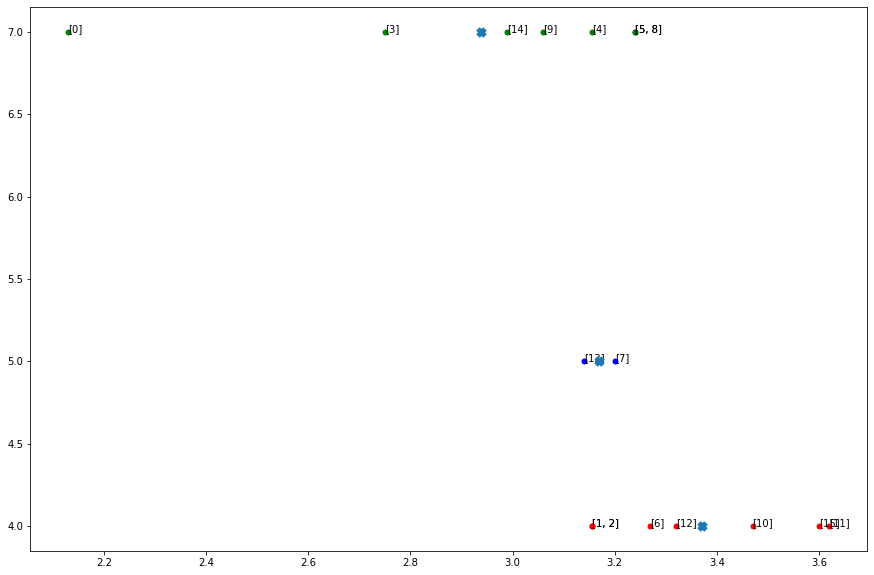

In [26]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['g.', 'r.', 'b.']

plt.figure(figsize = (15,10))

for i in range(len(x)):
    print ('coordinate %s '%i, x[i], 'labels %s' %labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize=10)
    list_cluster = tabel[(tabel['IPK'] == x[i][0]) & (tabel['MasaStudi'] == x[i][1])].index.tolist()
    plt.text(x[i][0], x[i][1], '%s' %(list_cluster))
plt.scatter(centroids[: , 0], centroids[: , 1], marker = 'x', s = 50, linewidths = 5, zorder = 10)
plt.show()

In [27]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

print(__doc__)

def silhoutte_test(X, range_n_clusters):
    for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
    
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, 
              "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
            ith_cluster_silhouette_values =                 sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
        
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
# Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
# Compute the new y_lower for next plot
            y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)
# Labeling the clusters
    centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Automatically created module for IPython interactive environment


For n_clusters = 2 The average silhouette_score is : 0.8167835829047798
For n_clusters = 3 The average silhouette_score is : 0.8036654982472575
For n_clusters = 4 The average silhouette_score is : 0.7334801728742433
For n_clusters = 5 The average silhouette_score is : 0.6905146323569271
For n_clusters = 6 The average silhouette_score is : 0.6015118702826509
For n_clusters = 7 The average silhouette_score is : 0.6124658448782565
For n_clusters = 8 The average silhouette_score is : 0.6264612513323284


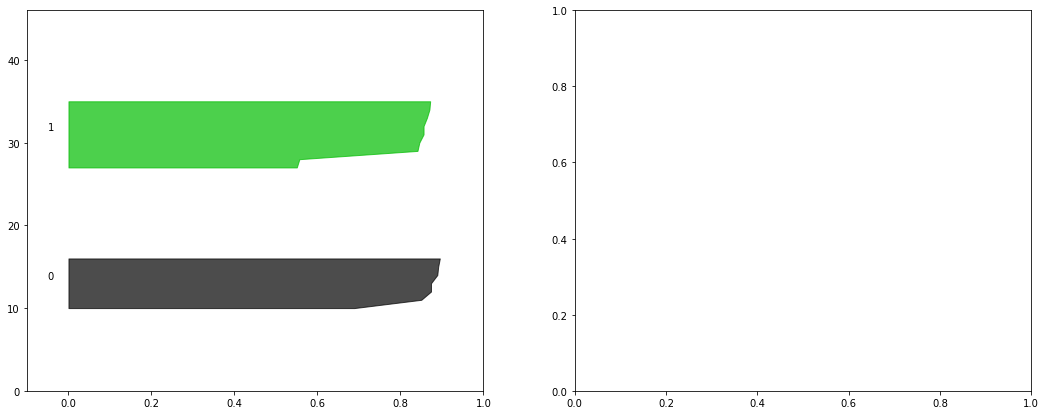

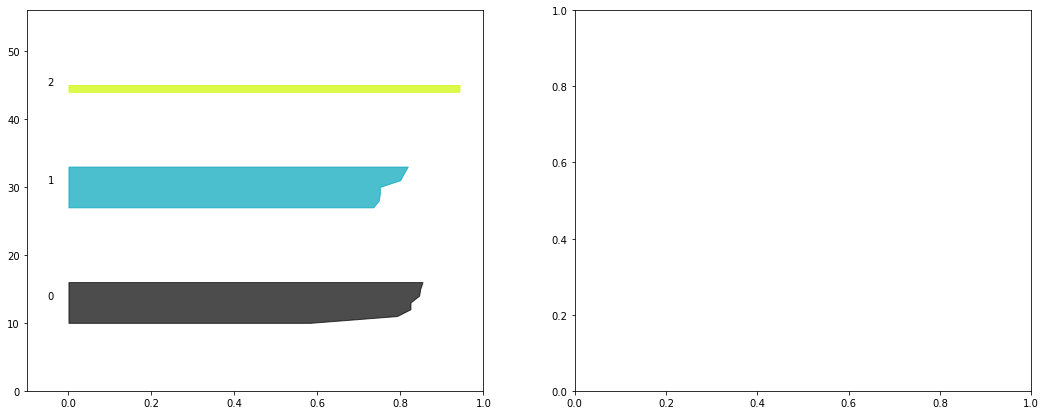

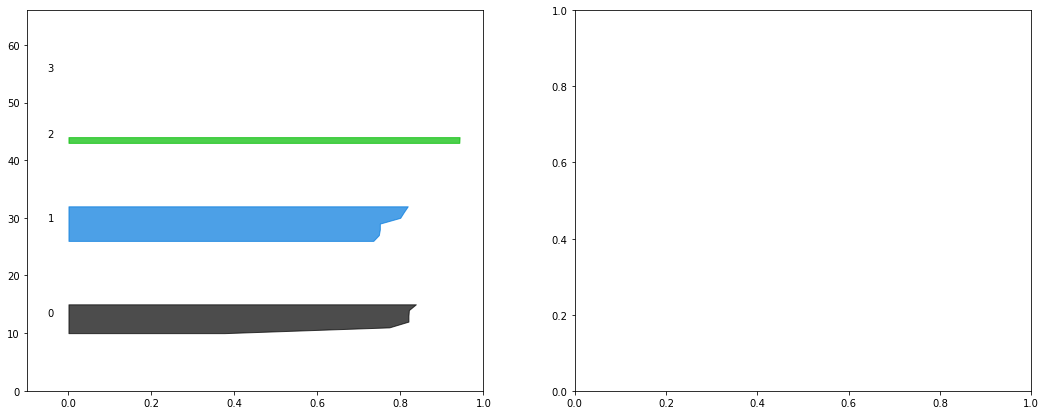

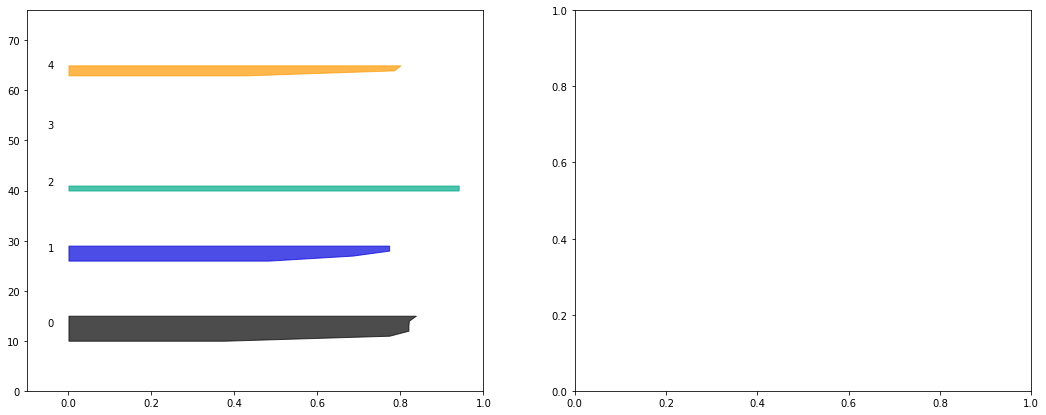

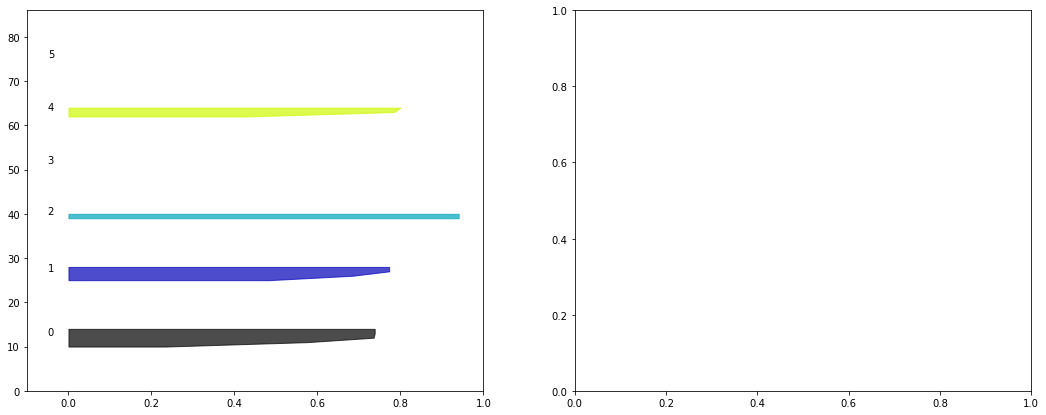

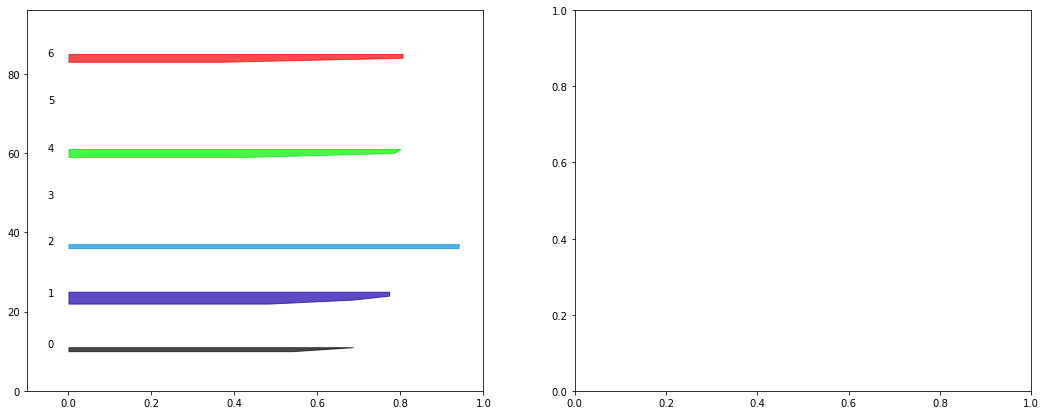

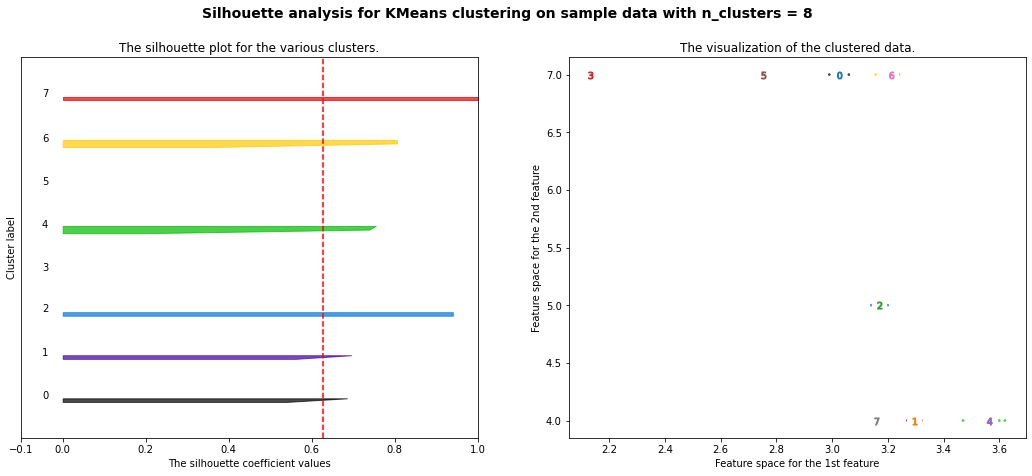

In [28]:
range_clusters = [2,3,4,5,6,7,8]
silhoutte_test(x, range_clusters)

In [29]:
import numpy as np
def purity_score (cluster, classes):
    A = np.c_[(cluster, classes)]
    n_accurate = 0.
    for j in np.unique(A[:,0]):
        z=A[A[:,0]==j, 1]
        x=np.argmax(np.max(z))
        n_accurate += len(z[z==x])
    return n_accurate/A.shape[0]

In [30]:
classes = [0,0,2,1,2,2,2,1,1,1,2,0,1,0,2,1]
print('clusters : %s' %labels)
print('clusters : %s' %np.array(classes))
purity_score(labels, classes)

clusters : [0 1 1 0 0 0 1 2 0 0 1 1 1 2 0 1]
clusters : [0 0 2 1 2 2 2 1 1 1 2 0 1 0 2 1]


0.25